In [1]:
import pandas as pd
import numpy as np

In [2]:
#Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [3]:
data = pd.read_excel(r"C:\Users\ragha\Downloads\PCA India Data_Census.xlsx")

In [4]:
data.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [5]:
data.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [7]:
data.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
#Part 2 - PCA: Perform detailed exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

In [10]:
# Calculate gender ratio for each row
data['Gender_Ratio'] = data['TOT_F'] / data['TOT_M']

# Identify state with highest gender ratio
max_gender_ratio_state = data.groupby('State')['Gender_Ratio'].mean().idxmax()
max_gender_ratio_value = data.groupby('State')['Gender_Ratio'].mean().max()

# Identify state with lowest gender ratio
min_gender_ratio_state = data.groupby('State')['Gender_Ratio'].mean().idxmin()
min_gender_ratio_value = data.groupby('State')['Gender_Ratio'].mean().min()

# Identify district with highest gender ratio
max_gender_ratio_district = data['Area Name'][data['Gender_Ratio'].idxmax()]
max_gender_ratio_district_value = data['Gender_Ratio'].max()

# Identify district with lowest gender ratio
min_gender_ratio_district = data['Area Name'][data['Gender_Ratio'].idxmin()]
min_gender_ratio_district_value = data['Gender_Ratio'].min()

max_gender_ratio_state, max_gender_ratio_value, min_gender_ratio_state, min_gender_ratio_value, max_gender_ratio_district, max_gender_ratio_district_value, min_gender_ratio_district, min_gender_ratio_district_value

('Andhra Pradesh',
 1.8950931296262146,
 'Lakshadweep',
 1.1519925134523903,
 'Krishna',
 2.28324963845265,
 'Lakshadweep',
 1.1519925134523903)

In [11]:
# EDA for 5 variables.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

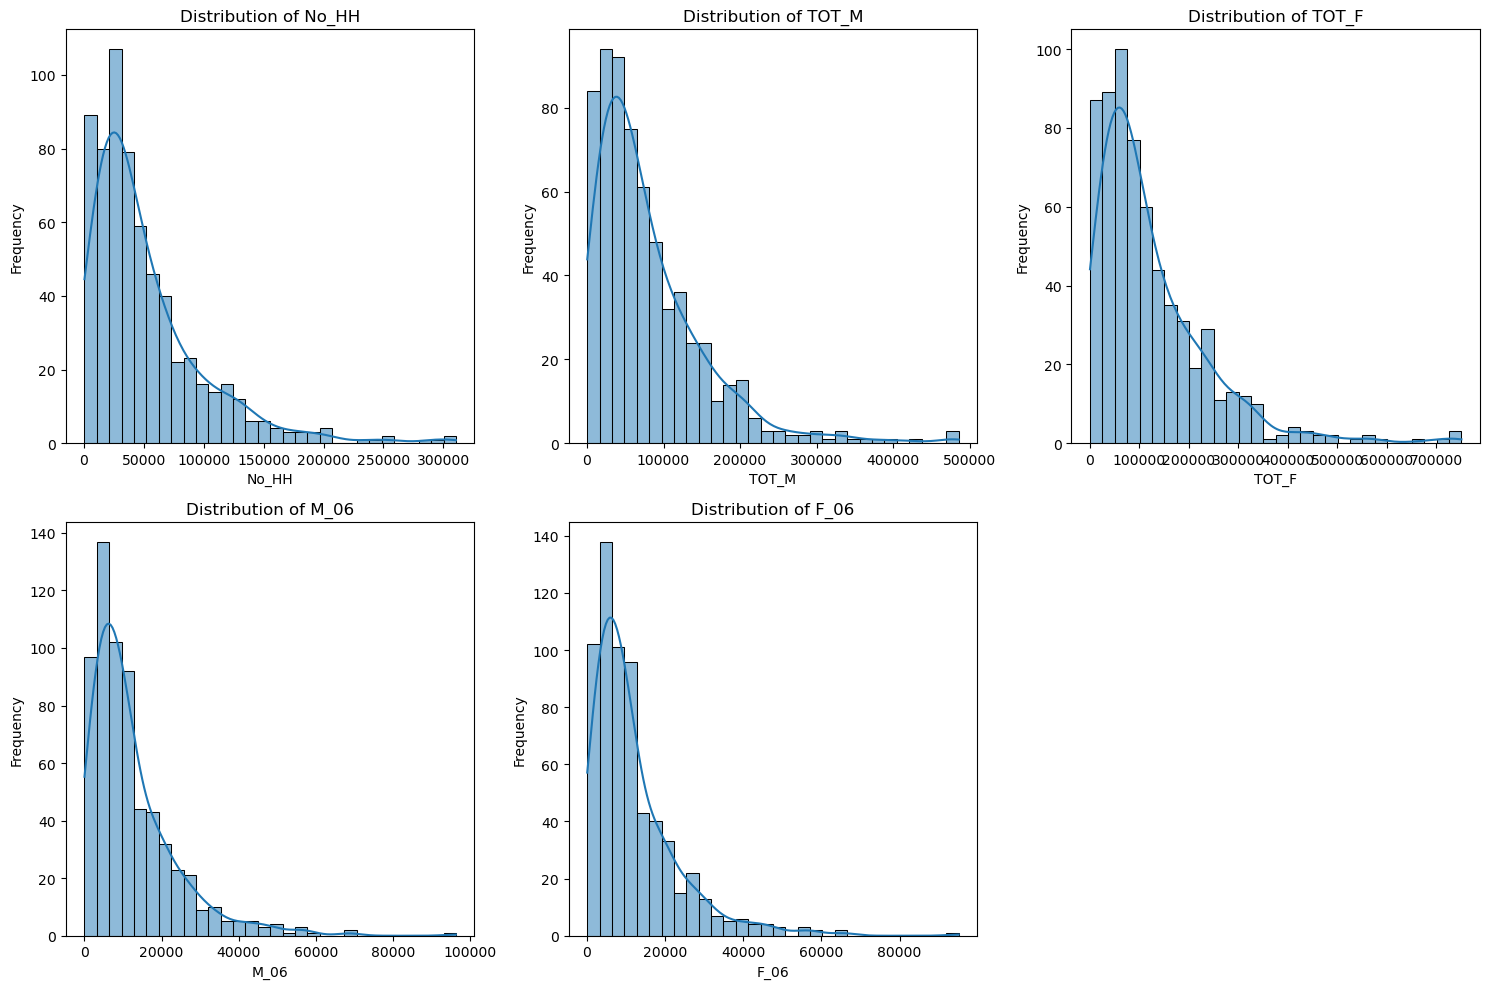

In [13]:
# Variables for EDA
variables = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06']

# Plot histograms
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[var], bins=30, kde=True)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [14]:
# Part 2 - PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

In [15]:
#No

In [16]:
#PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [17]:
from scipy.stats import zscore

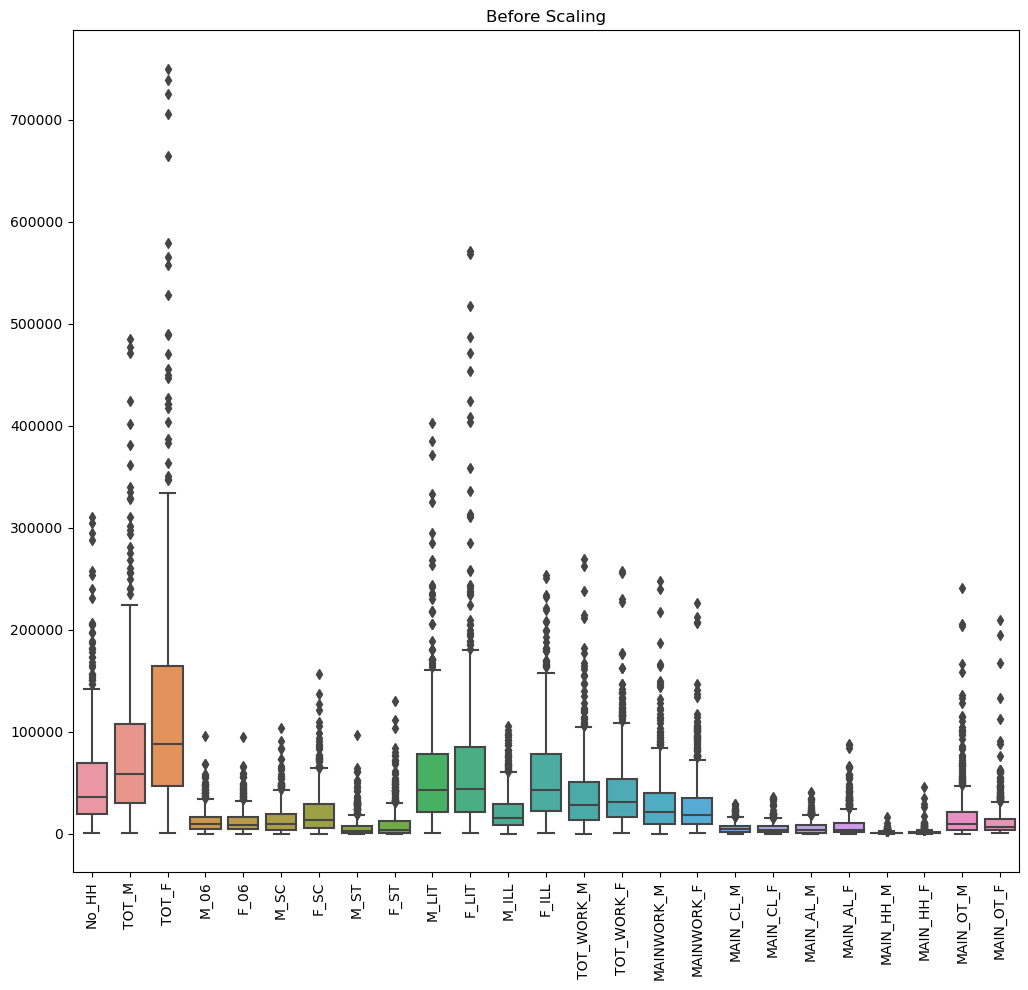

In [18]:
# Selected variables for PCA
variables_for_pca = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 
                     'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 
                     'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F']

# Scale the data
scaled_data = zscore(data[variables_for_pca])

# Convert scaled data to DataFrame for plotting
scaled_df = pd.DataFrame(scaled_data, columns=variables_for_pca)

# Plot boxplots to compare before and after scaling
plt.figure(figsize=(20, 10))

# Before scaling
plt.subplot(1, 2, 1)
sns.boxplot(data=data[variables_for_pca])
plt.title('Before Scaling')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

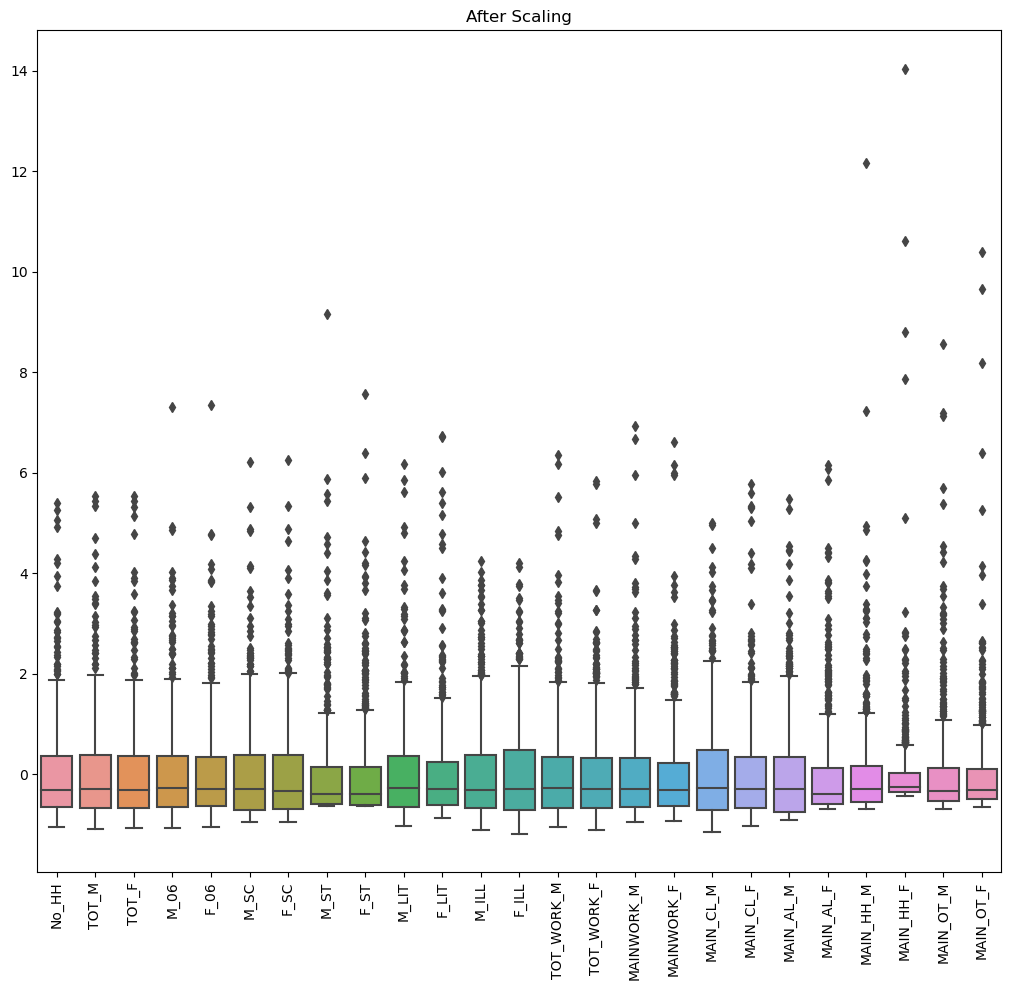

In [19]:
# After scaling
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
sns.boxplot(data=scaled_df)
plt.title('After Scaling')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
#Part 2 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [21]:
# Calculate the covariance matrix
cov_matrix = np.cov(scaled_data, rowvar=False)

# Get eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues, eigenvectors

(array([ 1.62107515e+01+0.00000000e+00j,  2.42307151e+00+0.00000000e+00j,
         2.00578300e+00+0.00000000e+00j,  1.34445040e+00+0.00000000e+00j,
         8.20116560e-01+0.00000000e+00j,  7.20513809e-01+0.00000000e+00j,
         5.05666322e-01+0.00000000e+00j,  3.07288778e-01+0.00000000e+00j,
         3.01513233e-01+0.00000000e+00j,  1.66973671e-01+0.00000000e+00j,
         7.47965844e-02+0.00000000e+00j,  6.11833157e-02+0.00000000e+00j,
         4.73587939e-02+0.00000000e+00j,  1.62702744e-02+0.00000000e+00j,
         1.09624342e-02+0.00000000e+00j,  9.37136341e-03+0.00000000e+00j,
         6.91859593e-03+0.00000000e+00j,  3.02374971e-03+0.00000000e+00j,
         1.58187256e-03+0.00000000e+00j,  5.93806200e-04+0.00000000e+00j,
         9.34086028e-04+0.00000000e+00j, -3.91161215e-16+0.00000000e+00j,
         3.47186015e-16+0.00000000e+00j,  1.13968974e-16+8.58639751e-17j,
         1.13968974e-16-8.58639751e-17j]),
 array([[-2.38709793e-01+0.00000000e+00j,  1.62290697e-02+0.00000000e

In [22]:
#Part 2 - PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

In [23]:
from warnings import filterwarnings
filterwarnings("ignore")

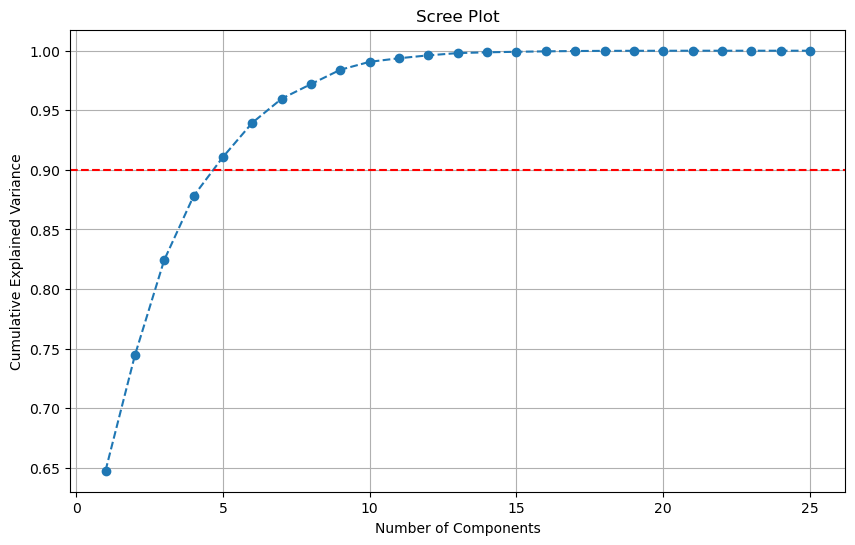

5

In [24]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Find the number of components capturing at least 90% variance
num_components = np.where(cumulative_variance >= 0.9)[0][0] + 1
num_components

In [25]:
#Part 2 - PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [26]:
# Extract the top 5 eigenvectors (corresponding to the 5 PCs)
top_eigenvectors = eigenvectors[:, :5]

# Get the contribution of each variable to each PC
contribution_df = pd.DataFrame(top_eigenvectors, index=variables_for_pca, columns=[f"PC{i+1}" for i in range(5)])

# For each PC, identify the variable that contributes the most
max_contributing_vars = contribution_df.idxmax()

max_contributing_vars

PC1         M_ST
PC2         F_ST
PC3    MAIN_CL_M
PC4    MAIN_AL_F
PC5    MAIN_HH_F
dtype: object

In [27]:
# PCA: Write linear equation for first PC.

In [28]:
# Construct the linear equation for PC1
equation = "PC1 = "
equation_terms = [f"{weight:.4f} * {var}" for weight, var in zip(top_eigenvectors[:, 0], variables_for_pca)]
equation += " + ".join(equation_terms)

equation

'PC1 = -0.2387+0.0000j * No_HH + -0.2419+0.0000j * TOT_M + -0.2446+0.0000j * TOT_F + -0.2209+0.0000j * M_06 + -0.2205+0.0000j * F_06 + -0.2148+0.0000j * M_SC + -0.2180+0.0000j * F_SC + -0.0351+0.0000j * M_ST + -0.0357+0.0000j * F_ST + -0.2401+0.0000j * M_LIT + -0.2260+0.0000j * F_LIT + -0.2184+0.0000j * M_ILL + -0.2298+0.0000j * F_ILL + -0.2418+0.0000j * TOT_WORK_M + -0.2256+0.0000j * TOT_WORK_F + -0.2354+0.0000j * MAINWORK_M + -0.2137+0.0000j * MAINWORK_F + -0.1426+0.0000j * MAIN_CL_M + -0.1109+0.0000j * MAIN_CL_F + -0.1728+0.0000j * MAIN_AL_M + -0.1340+0.0000j * MAIN_AL_F + -0.1842+0.0000j * MAIN_HH_M + -0.1282+0.0000j * MAIN_HH_F + -0.2068+0.0000j * MAIN_OT_M + -0.1944+0.0000j * MAIN_OT_F'